### Importación de datos



##Estructura de datos:
##El conjunto de datos incluye la siguiente información:

*   Producto y Categoría: Artículos vendidos y sus calificaciones.

*   Precio y Envío: Valores de venta y costos asociados.

*   Fecha y ubicación de compra: Información temporal y geográfica.

*   Evaluación de compra: Comentarios de clientes.

*   Tipo de Pago y Cuotas: Métodos utilizados por los clientes.

*   Coordenadas Geográficas: Ubicación de las transacciones.

In [153]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda1.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [154]:
#Librerias python a utilizar
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [155]:
tienda1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Producto                2359 non-null   object 
 1   Categoría del Producto  2359 non-null   object 
 2   Precio                  2359 non-null   float64
 3   Costo de envío          2359 non-null   float64
 4   Fecha de Compra         2359 non-null   object 
 5   Vendedor                2359 non-null   object 
 6   Lugar de Compra         2359 non-null   object 
 7   Calificación            2359 non-null   int64  
 8   Método de pago          2359 non-null   object 
 9   Cantidad de cuotas      2359 non-null   int64  
 10  lat                     2359 non-null   float64
 11  lon                     2359 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 221.3+ KB


In [156]:
tienda1.describe()

,Precio,Costo de envío,Calificación,Cantidad de cuotas,lat,lon
count,2.359000e+03,2359.000000,2359.000000,2359.000000,2359.000000,2359.000000
mean,4.878679e+05,26018.609580,3.976685,2.943196,5.365283,-74.789417
std,6.146868e+05,32860.001783,1.415370,2.819897,2.287445,1.217827
min,7.600000e+03,0.000000,1.000000,1.000000,-4.215280,-77.281110
25%,5.575000e+04,3100.000000,3.000000,1.000000,4.609710,-75.563590
50%,2.353000e+05,12400.000000,5.000000,1.000000,4.609710,-74.199040
75%,6.781000e+05,36000.000000,5.000000,4.000000,6.251840,-74.081750
max,2.977000e+06,160800.000000,5.000000,24.000000,11.544440,-67.923900


In [157]:
# Calculamos la facturacion de cada una de las tiendas
facturacion_tienda1=tienda1.Precio.sum()
facturacion_tienda2=tienda2.Precio.sum()
facturacion_tienda3=tienda3.Precio.sum()
facturacion_tienda4=tienda4.Precio.sum()
facturaciones = [facturacion_tienda1, facturacion_tienda2, facturacion_tienda3, facturacion_tienda4]

In [158]:
df_fact=pd.DataFrame(facturaciones, index=['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'], columns=['Facturacion'])
df_fact
tiendas = [tienda1, tienda2, tienda3, tienda4]
for x,tienda in enumerate(facturaciones):
  print(f'Facturacion tienda {x+1}: {facturaciones[x]:,.2f}')


Facturacion tienda 1: 1,150,880,400.00
Facturacion tienda 2: 1,116,343,500.00
Facturacion tienda 3: 1,098,019,600.00
Facturacion tienda 4: 1,038,375,700.00


In [159]:
import matplotlib.ticker as mtick;
import matplotlib.pyplot as plt;
print()

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

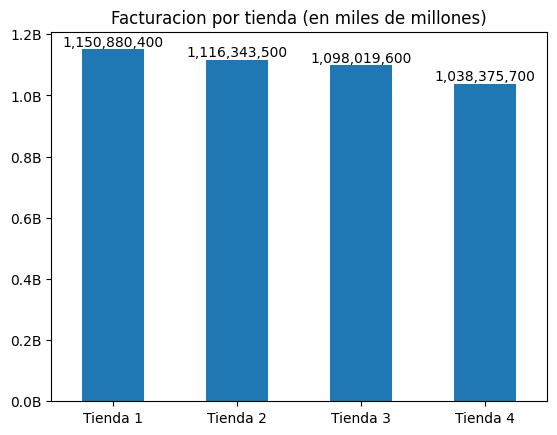

In [160]:

# Funcion para graficar facturacion por tienda
def facturacion():
  ax = df_fact.plot(kind='bar', title='Facturacion por tienda (en miles de millones)', legend=False)
  ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x/1e9:.1f}B'))

  for container in ax.containers:
      ax.bar_label(container, fmt='{:,.0f}'.format)

  plt.xticks(rotation=0)
  return plt

facturacion()

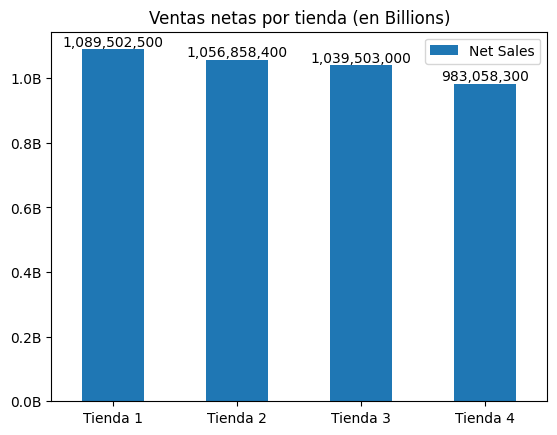

In [161]:
tiendas = [tienda1, tienda2, tienda3, tienda4]
tiendas_net_sales = []
for tienda in tiendas:
  tiendas_net_sales.append((tienda['Precio'] - tienda['Costo de envío']).sum())

df_net_sales = pd.DataFrame(tiendas_net_sales, index=['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'], columns=['Net Sales'])

ax = df_net_sales.plot(kind='bar', title='Ventas netas por tienda (en Billions)')
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x/1e9:.1f}B'))
for container in ax.containers:
    ax.bar_label(container, fmt='{:,.0f}'.format)
plt.xticks(rotation=0)
plt.show()

# 2. Ventas por categoría

In [162]:
# Lista con los dataframes de cada tienda
tiendas = [tienda1['Categoría del Producto'], tienda2['Categoría del Producto'], tienda3['Categoría del Producto'], tienda4['Categoría del Producto']]

# creo un dataframe uniendo cada tienda y adicionando una columna especificando a que tienda pertenece el dato
tiendas_combinadas = pd.concat(tiendas, keys=['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'])

# Reseteo el indice
tiendas_combinadas = tiendas_combinadas.reset_index(level=0).rename(columns={'level_0':'Tienda'})

# Visualizo como quedaron mis datos
display(tiendas_combinadas.sample(5))
tiendas_combinadas.info()

,Tienda,Categoría del Producto
1998,Tienda 1,Muebles
1655,Tienda 3,Electrónicos
160,Tienda 3,Artículos para el hogar
405,Tienda 1,Juguetes
335,Tienda 1,Instrumentos musicales


<class 'pandas.core.frame.DataFrame'>
Index: 9435 entries, 0 to 2357
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Tienda                  9435 non-null   object
 1   Categoría del Producto  9435 non-null   object
dtypes: object(2)
memory usage: 221.1+ KB


In [163]:
# visualizo cuantos productos se vendieron por tienda

tiendas_counts = tiendas_combinadas['Tienda'].value_counts()
tiendas_counts


,count
Tienda,
Tienda 1,2359
Tienda 2,2359
Tienda 3,2359
Tienda 4,2358


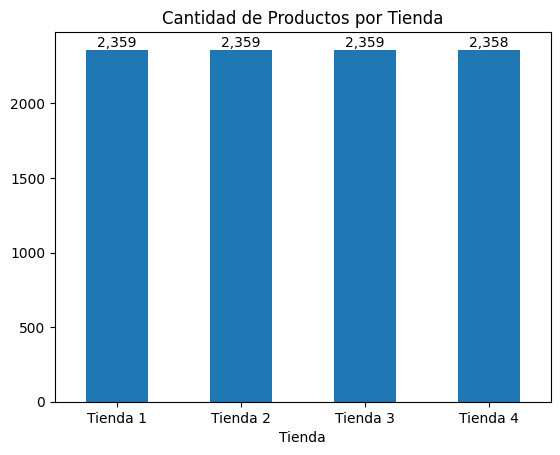

In [164]:
def cantidad_productos_tienda():
  # Creo un gráfico de barras con la cantidad de productos vendidos por tienda
  ax = tiendas_counts.plot(kind='bar', title='Cantidad de Productos por Tienda')
  plt.xticks(rotation=0)
  for container in ax.containers:
      ax.bar_label(container, fmt='{:,.0f}'.format)
  return plt
cantidad_productos_tienda().show()

In [165]:
# Creo un dataframe que agrupa por tienda, y categoria de Producto
productos_por_categoria_tienda = tiendas_combinadas.groupby(['Tienda', 'Categoría del Producto']).size().reset_index(name='Cantidad')
display(productos_por_categoria_tienda.head())


,Tienda,Categoría del Producto,Cantidad
0,Tienda 1,Artículos para el hogar,171
1,Tienda 1,Deportes y diversión,284
2,Tienda 1,Electrodomésticos,312
3,Tienda 1,Electrónicos,448
4,Tienda 1,Instrumentos musicales,182


In [166]:
# Agrupo por tienda, ordeno de mayor a menor, y obtengo el top-5
top_5_categorias_por_tienda = productos_por_categoria_tienda.groupby('Tienda').apply(lambda x: x.sort_values(by='Cantidad', ascending=False).head(5)).reset_index(drop=True)
display(top_5_categorias_por_tienda)


/tmp/ipython-input-3289077012.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_5_categorias_por_tienda = productos_por_categoria_tienda.groupby('Tienda').apply(lambda x: x.sort_values(by='Cantidad', ascending=False).head(5)).reset_index(drop=True)


,Tienda,Categoría del Producto,Cantidad
0,Tienda 1,Muebles,465
1,Tienda 1,Electrónicos,448
2,Tienda 1,Juguetes,324
3,Tienda 1,Electrodomésticos,312
4,Tienda 1,Deportes y diversión,284
5,Tienda 2,Muebles,442
6,Tienda 2,Electrónicos,422
7,Tienda 2,Juguetes,313
8,Tienda 2,Electrodomésticos,305
9,Tienda 2,Deportes y diversión,275


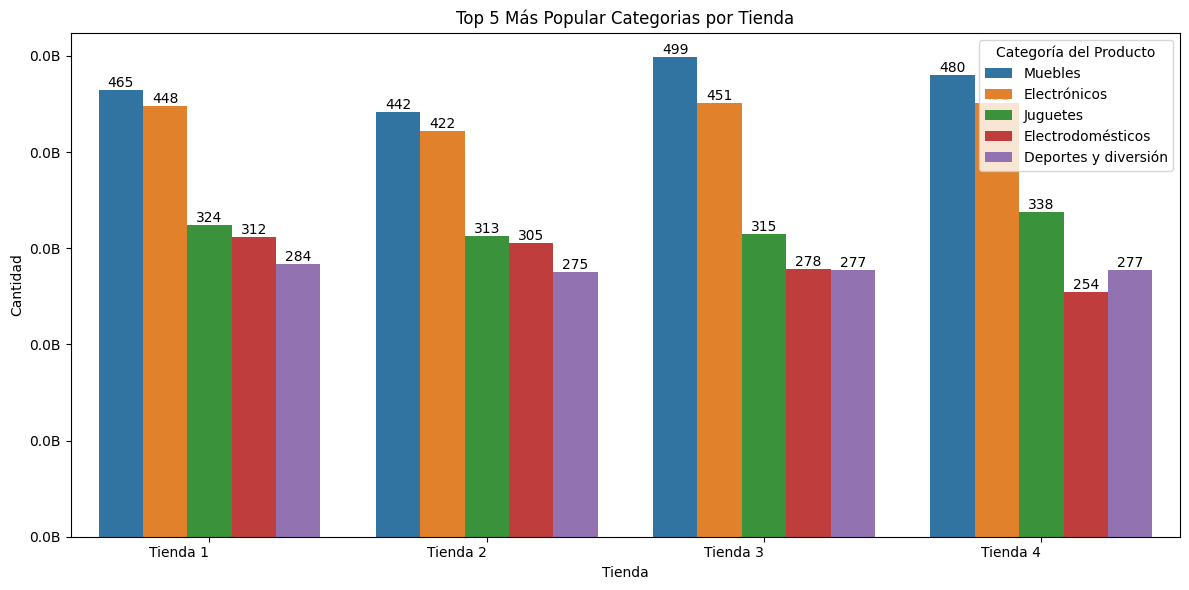

In [167]:
def top5_productos():
  # Agrego gráfica de Top 5 por categoria

  plt.figure(figsize=(12, 6))
  ax = sns.barplot(data=top_5_categorias_por_tienda, x='Tienda', y='Cantidad', hue='Categoría del Producto')
  plt.title('Top 5 Más Popular Categorias por Tienda')
  plt.xticks(rotation=0, ha='right')

  # Agrego lable en cada serie
  for container in ax.containers:
      ax.bar_label(container, fmt='{:,.0f}')

  # Aplico formato de Billones
  ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x/1e9:.1f}B'))

  plt.tight_layout()
  return plt
top5_productos().show()

# 3. Calificación promedio de la tienda


In [168]:
# Lista con los dataframes de cada tienda
tiendas = [tienda1['Calificación'], tienda2['Calificación'], tienda3['Calificación'], tienda4['Calificación']]

# creo un dataframe uniendo cada tienda y adicionando una columna especificando a que tienda pertenece el dato
tiendas_combinadas = pd.concat(tiendas, keys=['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'])

# Reseteo el indice
tiendas_combinadas = tiendas_combinadas.reset_index(level=0).rename(columns={'level_0':'Tienda'})

# Visualizo como quedaron mis datos
display(tiendas_combinadas.sample(5))
tiendas_combinadas.info()

,Tienda,Calificación
580,Tienda 3,5
764,Tienda 2,5
1354,Tienda 4,4
1650,Tienda 2,5
1365,Tienda 4,5


<class 'pandas.core.frame.DataFrame'>
Index: 9435 entries, 0 to 2357
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Tienda        9435 non-null   object
 1   Calificación  9435 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 221.1+ KB


In [169]:
calificacion_promedio = tiendas_combinadas.groupby('Tienda')['Calificación'].mean()
display(calificacion_promedio)

,Calificación
Tienda,
Tienda 1,3.976685
Tienda 2,4.037304
Tienda 3,4.048326
Tienda 4,3.995759


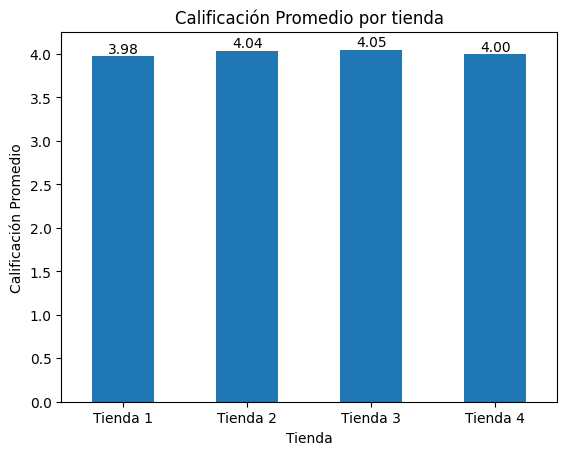

In [170]:
def calificacion_promedio_tienda():
  ax = calificacion_promedio.plot(kind='bar', title='Calificación Promedio por tienda')
  ax.set_xlabel('Tienda')
  ax.set_ylabel('Calificación Promedio')
  plt.xticks(rotation=0)
  for container in ax.containers:
      ax.bar_label(container, fmt='{:,.2f}')

  return plt
calificacion_promedio_tienda().show()

# 4. Productos más y menos vendidos

In [171]:
# Lista con los dataframes de cada tienda
tiendas = [tienda1, tienda2, tienda3, tienda4]

# creo un dataframe uniendo cada tienda y adicionando una columna especificando a que tienda pertenece el dato
todas = pd.concat(tiendas, keys=['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'])

# Reseteo el indice
todas = todas.reset_index().rename(columns={'level_0':'Tienda'})


# Visualizo como quedaron mis datos
display(todas.sample(5))


,Tienda,level_1,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
1080,Tienda 1,1080,Sillón,Muebles,193600.0,10500.0,01/10/2022,Izabela de León,Bogotá,4,Tarjeta de crédito,3,4.60971,-74.08175
7916,Tienda 4,839,Auriculares,Electrónicos,85500.0,4900.0,20/02/2023,Santiago Silva,Medellín,5,Tarjeta de crédito,10,6.25184,-75.56359
9391,Tienda 4,2314,Balón de voleibol,Deportes y diversión,57200.0,8700.0,17/10/2022,Juan Fernandez,Cartagena,5,Tarjeta de crédito,3,10.39972,-75.51444
2577,Tienda 2,218,Auriculares con micrófono,Electrónicos,142800.0,5800.0,19/10/2020,Juliana Costa,Medellín,5,Tarjeta de crédito,5,6.25184,-75.56359
2212,Tienda 1,2212,Bloques de construcción,Juguetes,43400.0,0.0,23/12/2020,Rafael Acosta,Cali,5,Tarjeta de crédito,3,3.43722,-76.52250


In [172]:
conteo_tienda = todas.groupby(['Tienda', 'Producto']).size().reset_index(name='Cantidad')
display(conteo_tienda.head())

,Tienda,Producto,Cantidad
0,Tienda 1,Ajedrez de madera,49
1,Tienda 1,Armario,60
2,Tienda 1,Asistente virtual,40
3,Tienda 1,Auriculares,50
4,Tienda 1,Auriculares con micrófono,33


In [173]:
top_tienda = conteo_tienda.groupby('Tienda').apply(lambda x: x[x['Cantidad'] == x['Cantidad'].max()]).reset_index(drop=True)
display(top_tienda)

/tmp/ipython-input-974236819.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_tienda = conteo_tienda.groupby('Tienda').apply(lambda x: x[x['Cantidad'] == x['Cantidad'].max()]).reset_index(drop=True)


,Tienda,Producto,Cantidad
0,Tienda 1,Armario,60
1,Tienda 1,Microondas,60
2,Tienda 1,TV LED UHD 4K,60
3,Tienda 2,Iniciando en programación,65
4,Tienda 3,Kit de bancas,57
5,Tienda 4,Cama box,62


In [174]:
menor_tienda = conteo_tienda.groupby('Tienda').apply(lambda x: x[x['Cantidad'] == x['Cantidad'].min()]).reset_index(drop=True)
display(menor_tienda)

/tmp/ipython-input-974042976.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  menor_tienda = conteo_tienda.groupby('Tienda').apply(lambda x: x[x['Cantidad'] == x['Cantidad'].min()]).reset_index(drop=True)


,Tienda,Producto,Cantidad
0,Tienda 1,Auriculares con micrófono,33
1,Tienda 1,Celular ABXY,33
2,Tienda 2,Juego de mesa,32
3,Tienda 3,Bloques de construcción,35
4,Tienda 4,Guitarra eléctrica,33


In [175]:
top_tienda['tipo'] = 'Top ventas'
menor_tienda['tipo'] = 'Menos ventas'
productos_combinados = pd.concat([top_tienda, menor_tienda])
display(productos_combinados.sample(5))

,Tienda,Producto,Cantidad,tipo
2,Tienda 2,Juego de mesa,32,Menos ventas
2,Tienda 1,TV LED UHD 4K,60,Top ventas
0,Tienda 1,Armario,60,Top ventas
4,Tienda 4,Guitarra eléctrica,33,Menos ventas
0,Tienda 1,Auriculares con micrófono,33,Menos ventas


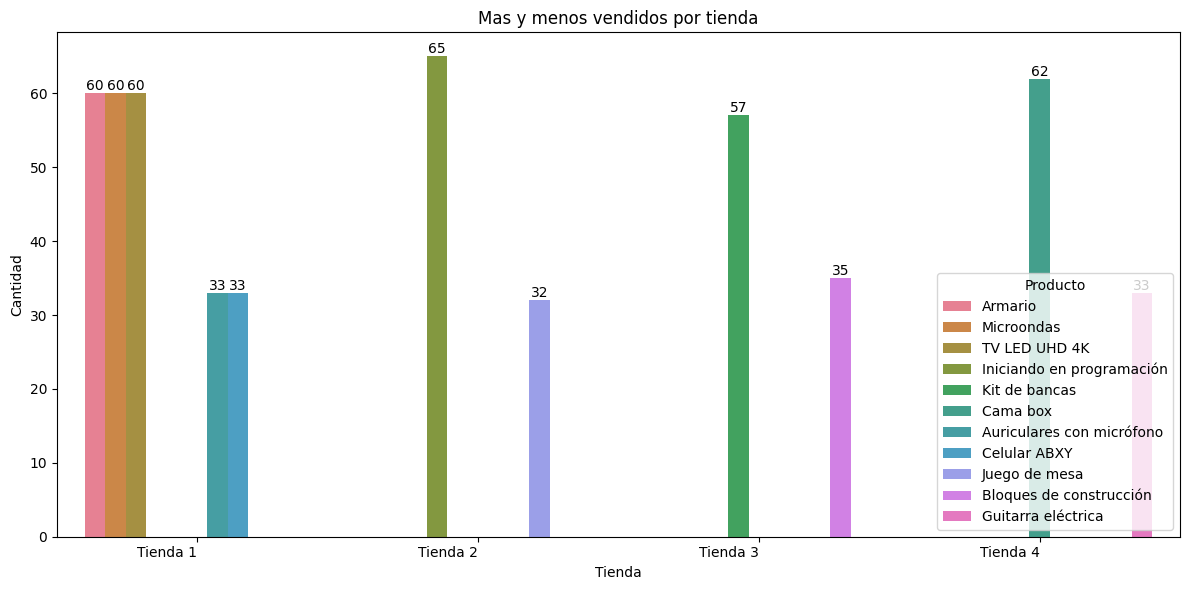

In [176]:
def top_less_vendidos():
  plt.figure(figsize=(12, 6))
  ax = sns.barplot(data=productos_combinados, x='Tienda', y='Cantidad', hue='Producto')
  plt.title('Mas y menos vendidos por tienda')
  plt.xticks(rotation=0, ha='right')

  for container in ax.containers:
      ax.bar_label(container, fmt='{:,.0f}')

  plt.tight_layout()
  return plt
top_less_vendidos().show()

# 5. Envío promedio por tienda

In [177]:
# promedio del costo de envio por tienda
costo_envio_prom = todas.groupby('Tienda')['Costo de envío'].mean()

# mostrar la serie costo envio por tienda
display(costo_envio_prom)

,Costo de envío
Tienda,
Tienda 1,26018.609580
Tienda 2,25216.235693
Tienda 3,24805.680373
Tienda 4,23459.457167


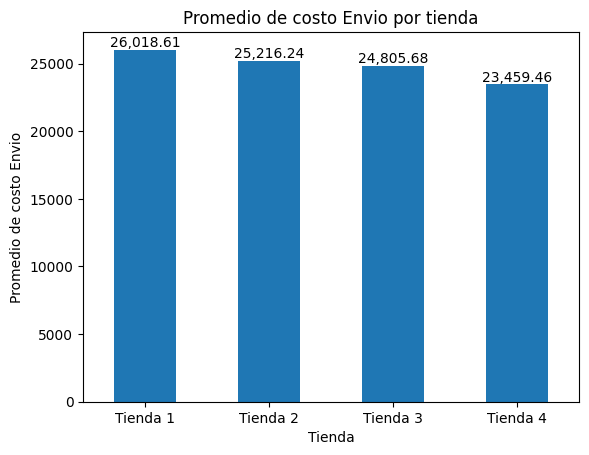

In [178]:
def envio_tienda():
  ax = costo_envio_prom.plot(kind='bar', title='Promedio de costo Envio por tienda')
  ax.set_xlabel('Tienda')
  ax.set_ylabel('Promedio de costo Envio')
  plt.xticks(rotation=0)
  for container in ax.containers:
      ax.bar_label(container, fmt='{:,.2f}')
  return plt
envio_tienda().show()

# *Informe Final*

*  Por Facturación:

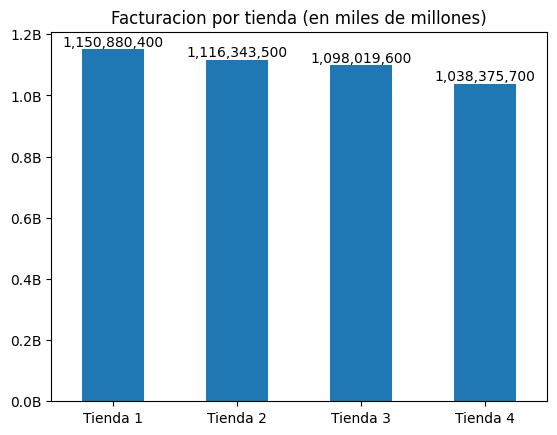

In [179]:
facturacion().show()

*  Por Calificación

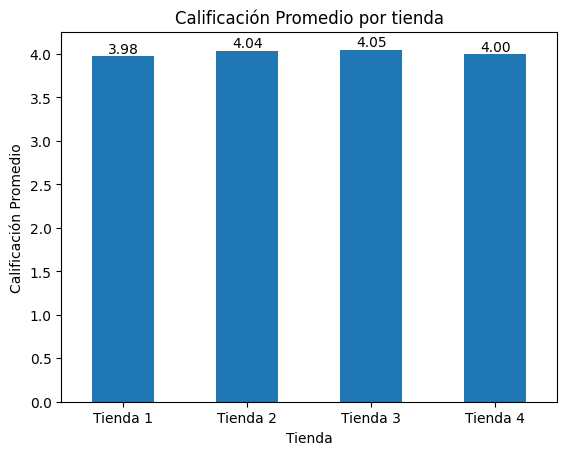

In [180]:
calificacion_promedio_tienda().show()

* Costo promedio de envío por tienda

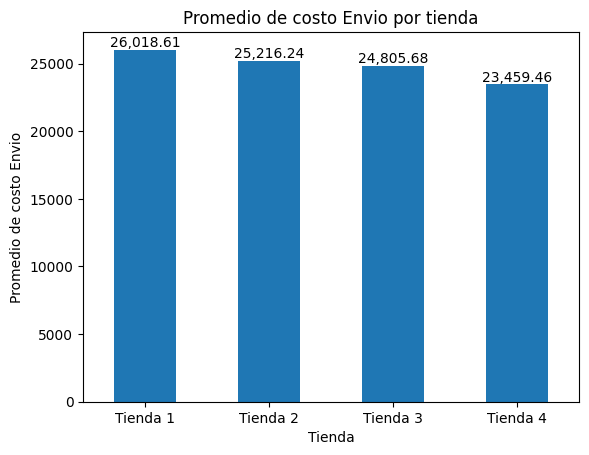

In [181]:
envio_tienda().show()

*  Cantidad de productos vendidos

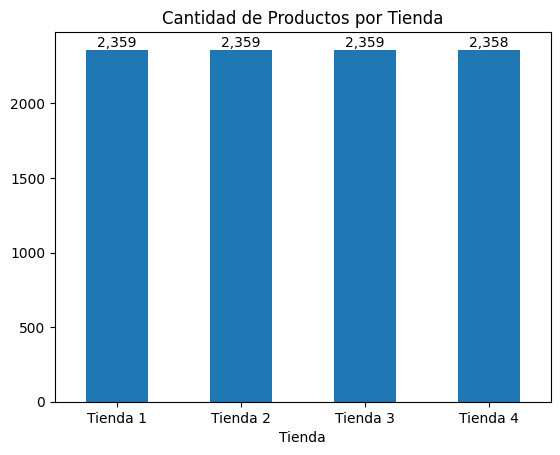

In [182]:
cantidad_productos_tienda().show()

# *RECOMENDACION*

* Las cuatro tiendas tienen en sus ventas aproximadamente la misma cantidad de productos por lo que son muy comparables entre sí.

* A nivel de ventas se observa que la tienda 1 tiene mayores ingresos y la menor es la tienda 4.

* A nivel de satisfacción de usuario por calificaciones recibidas la tienda 1 es la peor calificada, las otras tres son muy similares.

* Los costos de envio son importantes en la utilidad neta de la venta siendo la tienda 4 la que menos costos por envío aporta pero aún sigue siendo con la menor venta neta.

# **CONCLUSION**
Se recomienda al señor Juan vender la tienda 4 ya que las categorías evaluadas la que mayor peso tiene sería el dinero que genera por ventas. Las otras categorías no tienen una diferencia tan significativa como para cerrar otra tienda que estaría aportando mayor dinero al señor Juan.